<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Mécanique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Lois du frottement solide | Glisser - coller
             </div>
        </div>
    </div>
</div>

# Mise en œuvre du problème physique
##  Lois du frottement solide
Les lois de Coulomb modélisent les lois de frottement entre deux solides. On note $\overrightarrow{N}$ la composante normale au support et $\overrightarrow{T}$ la composante tangentielle de la force de frottement solide. En l'absence de glissement d'un solide par rapport à l'autre, on a :
$$\left\|\overrightarrow{T}\right\| \leq \mu_s \left\|\overrightarrow{N}\right\|$$

&nbsp;
Par contre dès que l'un des deux solides se met en mouvement par rapport à l'autre, on obtient l'égalité :
$$\left\|\overrightarrow{T}\right\| = \mu_d \left\|\overrightarrow{N}\right\|$$
avec $\mu_d < \mu_s$. La force de frottement est bien sûr opposée au mouvement.

## Stick-slip et tapis roulant
On s'intéresse au dispositif représenté ci-dessous :
<img src="fig1.png" style="height:150px">
La masse au bout du ressort est placée dans un référentiel galiléen et est soumise aux forces suivantes :
* le poids : $\vec{P}=-mg\vec{u}_z$ ;
* la réaction normale du support : $\vec{N}=N\vec{u}_z$ ;
* la réaction tangentielle du support : $\vec{T}=-\text{signe}(\dot{x})T\vec{u}_x$
* la tension du ressort : $\vec{R}=-k(x-\ell_0)\vec{u}_x$.

Le principe fondamental de la dynamique s'écrit alors *lorsque la masse glisse sur le tapis roulant* :
$$m\ddot{x}=-k(x-\ell_0) + \text{signe}(v_r-\dot{x}) \mu_d mg $$

&nbsp;
Dans le cas où la masse ne glisse plus, on a plus simplement :
$$\dot{x}=v_r$$

&nbsp;
    Ce cas ne peut arriver que si $\dot{x}=v_r$ et $k(x-\ell_0)<\mu_s mg $, c'est-à-dire $x<\ell_0+\frac{\mu_s mg}{k}$.

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib inline

# import des librairies 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Données propres à l'oscillateur
g = 9.81 # intensité de pesanteur
m = 0.1 # masse
k = 8.0 # contante de raideur du ressort
l0 = 0.15 # longueur à vide du ressort

vr = 0.04 # vitesse de roulement du tapis
mus = 0.37 # frottement statique
mud = 0.25 # frottement dynamique

In [3]:
# Durée d'intégraton
Tmax = 40.0
nd = 10000
deltat=Tmax/(nd-1)

# Conditions initiales
xv0 = [l0,vr]
t = np.linspace(0.0,Tmax,nd)

La résolution de cette équation différentielle sera réalisée par la fonction `odeint` en la ré-écrivant sous la forme :
$$\dfrac{\text{d}}{\text{d}t}X=f(X,t)$$

&nbsp;
Le vecteur $X$ est :
$$X=\left[\begin{array}{c}x \\ \dot{x}\end{array}\right]$$ 

et la fonction $f(X,t)$ s'écrit, lors d'un glissement : 
$$f(X,t)=\left[\begin{array}{c} \dot{x} \\ -\frac{k}{m}(x-\ell_0) + \frac{\text{signe}}{m}(v_r-\dot{x}) \mu_d g\end{array}\right]$$ 

&nbsp;
Dans le cas d'une absence de glissement, c'est-à-dire si $\dot{x}=v_r$ et $x<\ell_0+\frac{\mu_s mg}{k}$, on a plutôt : 
$$f(X,t)=\left[\begin{array}{c} v_r \\ 0\end{array}\right]$$

In [4]:
def deriv2(xv,t):
    coef = np.sign(vr-xv[1])
    if ((abs(xv[1]/vr - 1) <= 1E-6) and (xv[0] <= (l0+mus*m*g/k))) :
        return [vr,0.0]
    else :
        return [xv[1],-k/m*(xv[0]-l0)+mud*g*coef]

xv = odeint(deriv2,xv0,t)

X = xv[:,0]
Xpoint = xv[:,1]

La résolution terminée, on peut tracer les premiers instants de la position du mobile au cours du temps $x(t)$, de la vitesse $\dot{x}(t)$, ou encore le portrait de phase $\dot{x}=g(x)$.

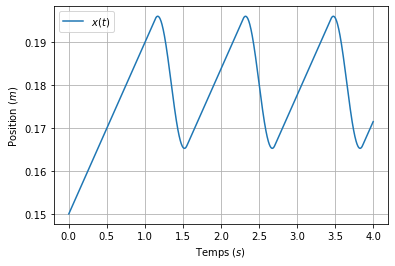

In [5]:
# Tracé du signal en fonction du temps
plt.figure()
plt.plot(t[:nd//10],X[:nd//10], label=r'$x(t)$') # On ne trace qu'une partie du signal calculé
plt.legend()
plt.grid(True)
plt.xlabel(r'Temps' ' ' r'$(s)$')
plt.ylabel(r'Position' ' ' r'$(m)$')
plt.show()

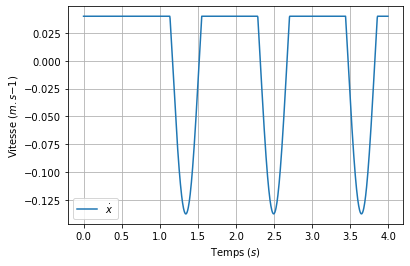

In [6]:
# Tracé du signal en fonction du temps
plt.figure()
plt.plot(t[:nd//10],Xpoint[:nd//10], label=r'$\dot{x}$') # On ne trace qu'une partie du signal calculé
plt.legend()
plt.grid(True)
plt.xlabel(r'Temps' ' ' r'$(s)$')
plt.ylabel(r'Vitesse' ' ' r'$(m.s{-1})$' )
plt.show()

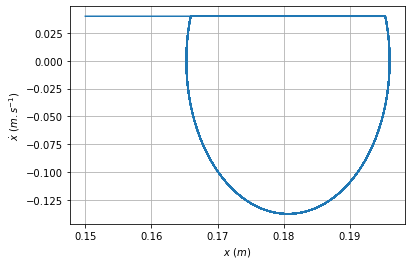

In [7]:
# Tracé du portrait de phase
plt.figure('Portrait de phase')
plt.plot(X,Xpoint)
plt.grid(True)
plt.xlabel(r'$x$' ' ' r'$(m)$')
plt.ylabel(r'$\dot{x}$' ' ' r'$(m.s^{-1})$')
plt.show()

## Spectre du mouvement
La transformation de Fourier, étudiée <a href="https://mybinder.org/v2/gh/CCayssiols/CN_PT_Fourier/HEAD">ici</a> permet de relever les fréquences présentes dans le signal de position ou de vitesse.

&nbsp;
*Note : les deux signaux ont une valeur moyenne non nulle et contiennent donc une fréquence nulle que nous avons choisi de retirer du tracé.*

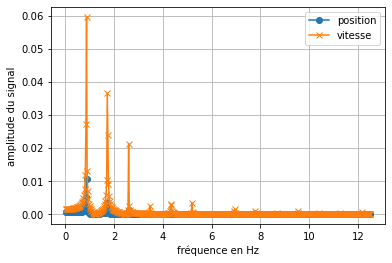

In [8]:
# Spectre du signal calculé sur 50/9=5,55 périodes
y = np.fft.rfft(X)/(nd//2+1)
y2 = np.fft.rfft(Xpoint)/(nd//2+1)
freq_k = np.array([i/Tmax for i in range(len(y))])


plt.figure()
# le spectre affiché est tronqué pour mieux les fréquences utiles
plt.plot(freq_k[1:nd//20+1],np.abs(y)[1:nd//20+1],'-o', label='position')
plt.plot(freq_k[1:nd//20+1],np.abs(y2)[1:nd//20+1],'-x', label='vitesse')
plt.legend()
plt.xlabel('fréquence en Hz')
plt.ylabel('amplitude du signal')
plt.grid(True)
plt.show()